**Applied Statistics**<br/>
Prof. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

In [2]:
# Python set up (load modules) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency, fisher_exact
from sklearn.model_selection import train_test_split

# Application: Logistic Regression 





# Task Description

In this problem set we analyse the relationship between online ads and purchase behavior. In particular, we want to classify which online users are likely to purchase a certain product after being exposed to an online ad.  

Use the dataset "purchase.csv"

Tasks:

* 1. Explore the data in detail and describe your findings (use exploratory data analysis). 
* 2. Logistic regression model:
* 2. a) Fit a logistic regression model with all predictor variables (response: Purchased; predictors: Gender, Age, EstimatedSalary).  
* 2. b) Please explain wether you would recommend to exclude a predictor variable from your model (from task 2a)). Update your model if necessary.
* 2. c) Use your updated model and predict the probability that an online user will purchase a product. Classify an online user as purchaser (with label 'Yes')  if the predicted probability of the purchase exceeds:
* 2. c1): 0.4 (i.e. threshold = 0.4) 
* 2. c2): 0.5 (i.e. threshold = 0.5)
* 2. c3): 0.7 (i.e. threshold = 0.7). Otherwise classify the user as non-purchaser (with label 'No').

* 2. d) Compute the confusion matrix for every threshold (c1), c2) and c3)) in order to determine how many observations were correctly or incorrectly classified. Furthermore, use the results from the confusion matrix and create the following variables: true positive; true negative; false positive and false negative. Use these variables to calculate the following measures: "Accuracy", Precision" (what proportion of positive identifications was actually correct?), "Recall" (what proportion of actual positives was identified correctly) and the F1 score (measure of a test's accuracy) for the thresholds in c1), c2) and c3). Which threshold would you recommend? Hints: Precision is defined as the number of true positives over the number of true positives plus the number of false positives. Recall is defined as the number of true positives over the number of true positives plus the number of false negatives. These two quantities are related to the F1 score, which is defined as the harmonic mean of precision and recall: $F1 = 2* ((Precision * Recall)/(Precision + Recall)).$

* 2. e) Fit the logistic regression model using a training data set. Compute the confusion matrix and accuracy for the held out data (test data). Use a threshold of 0.5.

---

## Import data

In [3]:
# Load the csv data files into pandas dataframes
PATH = '/Users/jankirenz/Dropbox/Data/' 
df = pd.read_csv(PATH + 'purchase.csv')

## Tidying data

### Data inspection

First of all, let's take a look at the variables (columns) in the data set.

In [4]:
# show all variables in the data set
df.columns

Index(['Unnamed: 0', 'User ID', 'Gender', 'Age', 'EstimatedSalary',
       'Purchased'],
      dtype='object')

In [5]:
# show the first 5 rows (i.e. head of the DataFrame)
df.head(5)

,Unnamed: 0,User ID,Gender,Age,EstimatedSalary,Purchased
0,1,15624510,Male,19,19000,0
1,2,15810944,Male,35,20000,0
2,3,15668575,Female,26,43000,0
3,4,15603246,Female,27,57000,0
4,5,15804002,Male,19,76000,0


In [6]:
# show the lenght of the variable id (i.e. the number of observations)
len(df["User ID"])

400

In [7]:
# Check, if we have the same User ID multiple times:
print(f'User IDs: {len(df["User ID"])}')
print(f'Unique User IDs: {len(df["User ID"].value_counts())}')

User IDs: 400
Unique User IDs: 400


In [8]:
# Drop variables
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('User ID', axis=1)

In [9]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [10]:
# Set Gender and Purchased to categorical
df[['Gender', 'Purchased']] = df[['Gender', 'Purchased']].astype('category')

# Replace purchased code by speaking label
df['Purchased'] = df['Purchased'].replace({0:'No', 1:'Yes'})

In [11]:
# show the first 5 rows (i.e. head of the DataFrame)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,No
1,Male,35,20000,No
2,Female,26,43000,No
3,Female,27,57000,No
4,Male,19,76000,No


### Handle missing values

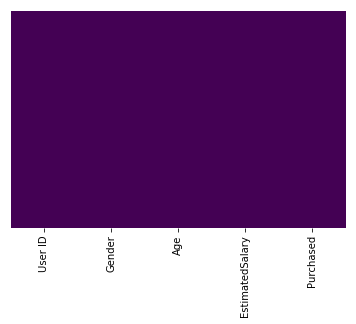

In [13]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

We can also check the column-wise distribution of null values:

In [14]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


# Task 1) Exploratory Data Analysis

In [12]:
# summary statistics for all numerical columns
round(df.describe(),2)

,Age,EstimatedSalary
count,400.00,400.00
mean,37.66,69742.50
std,10.48,34096.96
min,18.00,15000.00
25%,29.75,43000.00
50%,37.00,70000.00
75%,46.00,88000.00
max,60.00,150000.00


In [13]:
# summary statistics for all numerical columns
round(df.describe(include='category'),2)

,Gender
count,400
unique,2
top,Female
freq,204


In [14]:
# summary statistics by groups
df['Age'].groupby(df['Purchased']).describe()

,count,mean,std,min,25%,50%,75%,max
Purchased,,,,,,,,
No,257.0,32.793774,7.985844,18.0,26.0,34.0,38.0,59.0
Yes,143.0,46.391608,8.612172,27.0,39.5,47.0,53.0,60.0


In [15]:
# summary statistics by groups
df['EstimatedSalary'].groupby(df['Purchased']).describe()

,count,mean,std,min,25%,50%,75%,max
Purchased,,,,,,,,
No,257.0,60544.747082,24351.570102,15000.0,44000.0,61000.0,77000.0,141000.0
Yes,143.0,86272.727273,42064.200064,20000.0,41000.0,90000.0,122500.0,150000.0


### Visualize data

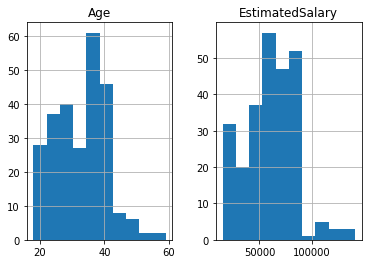

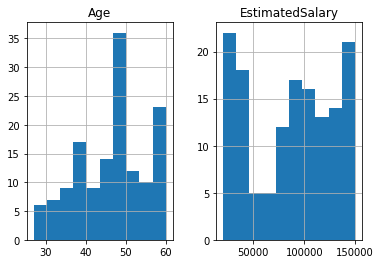

In [19]:
df.groupby('Purchased').hist();

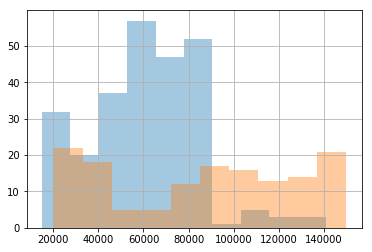

In [20]:
df.groupby('Purchased').EstimatedSalary.hist(alpha=0.4);

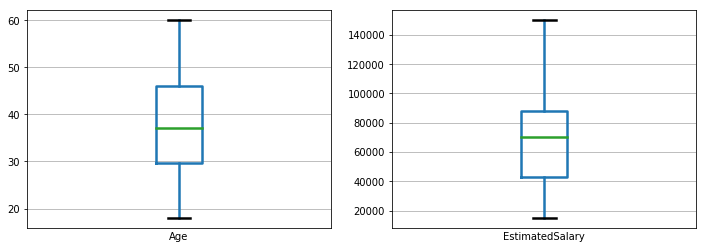

In [29]:
lw = dict(linewidth=2.5)
props = dict(boxprops=lw, whiskerprops=lw, capprops=lw, medianprops=lw)

plt.figure(figsize=(12, 4))
plt.subplot(121)
df[['Age']].boxplot(**props)
plt.xlabel('Age')
plt.xticks([], [])
plt.subplot(122)
df[['EstimatedSalary']].boxplot(**props)
plt.xlabel('EstimatedSalary')
plt.xticks([], [])
plt.show();

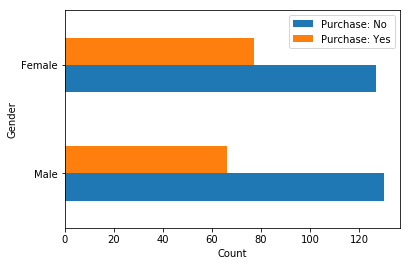

In [22]:
df_gender = df[['Gender', 'Purchased', 'Age']] \
            .groupby(['Purchased', 'Gender']) \
            .count() \
            .unstack('Purchased', 'Gender') \
            .fillna(0) \
            .iloc[::-1]

df_gender.plot(kind='barh')
plt.legend(['Purchase: No', 'Purchase: Yes'])
plt.xlabel('Count')

plt.show();

/Users/jankirenz/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


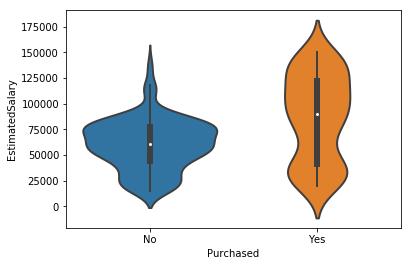

In [31]:
sns.violinplot(x=df['Purchased'], y=df['EstimatedSalary'], linewidth=2, xlabel='test');

/Users/jankirenz/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


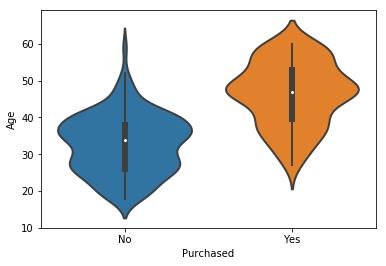

In [32]:
sns.violinplot(x=df['Purchased'], y=df['Age'], linewidth=2);


/Users/jankirenz/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


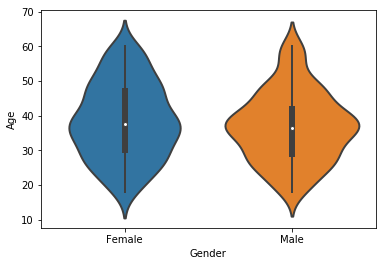

In [33]:
sns.violinplot(x=df['Gender'], y=df['Age'], linewidth=2);


### Relationship between variables

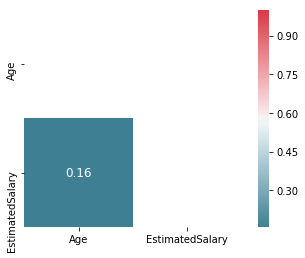

In [24]:
# Inspect relationship between variables (correlation)
# Calculate correlation using the default method ( "pearson")
corr = df.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

## 5 Model

# 2) Logistic Regression

## 2a) Model with all predictors

In [35]:
# Encode Male=0 and Female=1
X = df[['Age', 'EstimatedSalary', 'Gender']].copy()
X['Gender'] = pd.get_dummies(X['Gender'])

# Statsmodel needs a constant added manually
X['Intercept'] = 1

X.head()

,Age,EstimatedSalary,Gender,Intercept
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,1
3,27,57000,1,1
4,19,76000,0,1


In [36]:
# Encode purchase = 1 and no purchase = 0. Convert to float, as statsmodel likes it like that.
y = pd.get_dummies(df['Purchased'])
y = y['Yes'].astype('float')
y.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: Yes, dtype: float64

In [37]:
# Define and fit logistic regression model
logit = sm.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Fri, 05 Oct 2018   Pseudo R-squ.:                  0.4711
Time:                        22:00:12   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
                                        LLR p-value:                 5.488e-53
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.2370      0.026      8.984      0.000       0.185       0.289
EstimatedSalary  3.644e-05   5.47e-06      6.659      0.000    2.57e-05    4.72e-05
Gender             -0.3338      0.305     -1.094      0.274      -0.932       0.264
Intercept         -12.4498      1.309     -9.510      0.000     -15.016      -9.884
===================================================================================
"""

## 2. b) Update Model

In [38]:
# Define and fit logistic regression model
X = X.drop('Gender', axis=1)
logit = sm.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.346314
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Fri, 05 Oct 2018   Pseudo R-squ.:                  0.4688
Time:                        22:01:18   Log-Likelihood:                -138.53
converged:                       True   LL-Null:                       -260.79
                                        LLR p-value:                 7.995e-54
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.2335      0.026      9.013      0.000       0.183       0.284
EstimatedSalary   3.59e-05   5.43e-06      6.613      0.000    2.53e-05    4.65e-05
Intercept         -12.4340      1.300     -9.566      0.000     -14.982      -9.886
===================================================================================
"""

## 2c) Predict

In [40]:
# Predict and join probabilty to original dataframe
df['Probability'] = logit.predict(X)
df.head()

,Gender,Age,EstimatedSalary,Purchased,Probability
0,Male,19,19000,No,0.000665
1,Male,35,20000,No,0.028090
2,Female,26,43000,No,0.008006
3,Female,27,57000,No,0.016571
4,Male,19,76000,No,0.005121


In [41]:
# Use thresholds to discretize Probability
df['Threshold 0.4'] = np.where(df['Probability'] > 0.4, 'Yes', 'No')
df['Threshold 0.5'] = np.where(df['Probability'] > 0.5, 'Yes', 'No')
df['Threshold 0.6'] = np.where(df['Probability'] > 0.6, 'Yes', 'No')
df['Threshold 0.7'] = np.where(df['Probability'] > 0.7, 'Yes', 'No')
df.head(10)

,Gender,Age,EstimatedSalary,Purchased,Probability,Threshold 0.4,Threshold 0.5,Threshold 0.6,Threshold 0.7
0,Male,19,19000,No,0.000665,No,No,No,No
1,Male,35,20000,No,0.028090,No,No,No,No
2,Female,26,43000,No,0.008006,No,No,No,No
3,Female,27,57000,No,0.016571,No,No,No,No
4,Male,19,76000,No,0.005121,No,No,No,No
5,Male,27,58000,No,0.017166,No,No,No,No
6,Female,27,84000,No,0.042530,No,No,No,No
7,Female,32,150000,Yes,0.604157,Yes,Yes,Yes,No
8,Male,25,33000,No,0.004443,No,No,No,No
9,Female,35,65000,No,0.126939,No,No,No,No


## 2. d) Confusion Matrix & Metrics

In [44]:
def print_metrics(df, predicted):
    # Header
    print('-'*50)
    print(f'Metrics for: {predicted}\n')
    
    # Confusion Matrix
    y_actu = pd.Series(df['Purchased'], name='Actual')
    y_pred = pd.Series(df[predicted], name='Predicted')
    df_conf = pd.crosstab(y_actu, y_pred)
    display(df_conf)
    
    # Confusion Matrix to variables:
    pop = df_conf.values.sum()
    tp = df_conf['Yes']['Yes']
    tn = df_conf['No']['No']
    fp = df_conf['Yes']['No']
    fn = df_conf['No']['Yes']
    
    # Metrics
    accuracy = (tp + tn) / pop
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    print(f'Accuracy:  {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall:    {recall:.4f}')
    print(f'F1 Score:  {f1_score:.4f} \n')

In [45]:
print_metrics(df, 'Threshold 0.4')
print_metrics(df, 'Threshold 0.5')
print_metrics(df, 'Threshold 0.6')
print_metrics(df, 'Threshold 0.7')

--------------------------------------------------
Metrics for: Threshold 0.4



Predicted,No,Yes
Actual,,
No,221,36
Yes,29,114


Accuracy:  0.8375
Precision: 0.7600
Recall:    0.7972
F1 Score:  0.7782 

--------------------------------------------------
Metrics for: Threshold 0.5



Predicted,No,Yes
Actual,,
No,236,21
Yes,41,102


Accuracy:  0.8450
Precision: 0.8293
Recall:    0.7133
F1 Score:  0.7669 

--------------------------------------------------
Metrics for: Threshold 0.6



Predicted,No,Yes
Actual,,
No,242,15
Yes,54,89


Accuracy:  0.8275
Precision: 0.8558
Recall:    0.6224
F1 Score:  0.7206 

--------------------------------------------------
Metrics for: Threshold 0.7



Predicted,No,Yes
Actual,,
No,245,12
Yes,65,78


Accuracy:  0.8075
Precision: 0.8667
Recall:    0.5455
F1 Score:  0.6695 



  - If we need the model to predict the purchasers to trigger a campaign that is very expensive and will only pay off if it's exposed to purchasers, and would have major negative effects, if exposed to a non-purchaser, then the precision would be crucial. Threshold 0.7.

  - If a model is needed, where it's important that I get a lot of the absolute true positives, and it doesn't matter a lot, and the true negatives are of no importance, then F-Score is a good metric. It's also often used as a metric for query results in information retrieval. The best F1-score is reached with Threshold 0.4
  
  - Accuracy is the ratio of correctly classified elements. This would be e.g. a good metric, if I want to target purchasers and non-purchasers with two different campaigns of medium impact in case of false classifications. Threshold 0.5 has the best score here.

  - The metric Recall takes only the true/false positives into account. It would be a good metric, if I want to target possible purchasers and don't worry a lot about false positives. The Threshold 0.4 would be right.

## 2. e) Use Train & Test for modelling and evaluation

In [46]:
# Split Dataset
train_X, test_X, train_y, test_y = train_test_split(X.copy(), y.copy(), test_size=0.3)
print(f'Trainingset size: {len(train_X)}')
print(f'Testingset size: {len(test_X)}')

Trainingset size: 280
Testingset size: 120


In [47]:
# Train logistic regression model with training set
logit = sm.Logit(train_y, train_X).fit()

Optimization terminated successfully.
         Current function value: 0.312552
         Iterations 8


In [48]:
# Predict test data
test_X['Probability'] = logit.predict(test_X)

In [49]:
# Calculate metrics
test_X['Purchased'] = np.where(test_y == 1.0, 'Yes', 'No')  # Join actual values
test_X['Threshold 0.5'] = np.where(test_X['Probability'] > 0.5, 'Yes', 'No')  # Calc categories by threshold
test_X.head(7)

,Age,EstimatedSalary,Intercept,Probability,Purchased,Threshold 0.5
274,57,26000,1,0.874198,Yes,Yes
63,32,120000,1,0.322437,Yes,No
77,22,27000,1,0.000993,No,No
252,48,134000,1,0.979541,Yes,Yes
294,35,57000,1,0.080168,No,No
10,26,80000,1,0.021279,No,No
27,47,30000,1,0.390391,Yes,No


In [50]:
print_metrics(test_X, 'Threshold 0.5')

--------------------------------------------------
Metrics for: Threshold 0.5



Predicted,No,Yes
Actual,,
No,62,9
Yes,16,33


Accuracy:  0.7917
Precision: 0.7857
Recall:    0.6735
F1 Score:  0.7253 

